After finding some promising results with the NN, when trained on 12 features, ebv, stardens, etc. (excluding fracgood, ndet, despite the initial version), we decide to do some clustering measurements.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/global/homes/m/mehdi/github/DESILSS')

In [2]:
from syslss import maps2pcinput, paircount

In [3]:
import healpy as hp
import numpy as np
import fitsio as ft

In [4]:
def get_xi_pc(delta, weight, res=512, maxang=180., mask=None):
    bw = 3*hp.nside2resol(res)*180./3.1416   # binwidth should be 3x larger than the resolution
    bins = np.arange(bw, maxang, bw)
    theta, phi, deltam, fpixm = maps2pcinput(delta, weight, mask=mask)
    w = paircount(theta, phi, deltam, deltam, fpixm, np.deg2rad(bins))
    binc = 0.5*(bins[1:]+bins[:-1])
    return [binc, w]

In [5]:
# 256
# ELG
elghp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg256.fits')
# Random map
ranhp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran256.fits')
# NN selection func.
nnhp  = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-nn256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [6]:
mask  = ranhp >= 0.01 * (10000*hp.nside2pixarea(256, degrees=True))
mask &= nnhp  !=0.0
delta = np.zeros(12*256**2)
delta[mask] = elghp[mask] / ranhp[mask] * (ranhp[mask].sum()/elghp[mask].sum()) - 1.

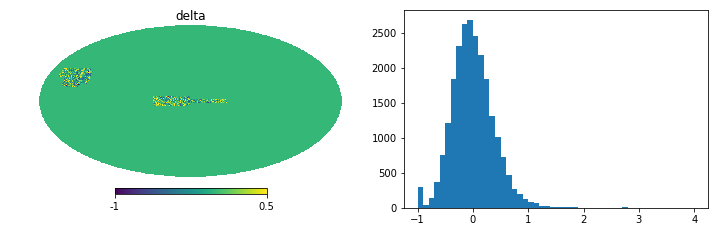

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(221)
hp.mollview(delta, title='delta', max=0.5, hold=True)
plt.subplot(222)
# plt.yscale('log')
_=plt.hist(delta[delta!=0.0], bins=[-1+0.05*i for i in range(0,101, 2)])

In [8]:
pc_uni = get_xi_pc(delta, ranhp/np.max(ranhp), res=256, maxang=30, mask=mask)

In [9]:
ranNN = ranhp *  nnhp
deltaNN = np.zeros(12*256**2)
deltaNN[mask] = elghp[mask] / ranNN[mask] * (ranNN[mask].sum()/elghp[mask].sum()) - 1.

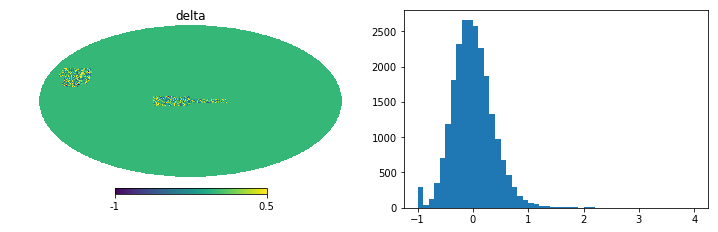

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(221)
hp.mollview(deltaNN, title='delta', max=0.5, hold=True)
plt.subplot(222)
# plt.yscale('log')
_=plt.hist(deltaNN[deltaNN!=0.0], bins=[-1+0.05*i for i in range(0,101, 2)])

In [11]:
pc_nn = get_xi_pc(deltaNN, ranhp/np.max(ranhp), res=256, maxang=6., mask=mask)

We want to increase the resolution of healpix maps delta and weights

In [ ]:
# # read data
# data = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.dat.fits', 
#                lower=True, columns=['ra', 'dec'])
# # print(data.dtype.names)
# elgmap = hpixsum(nside, data['ra'], data['dec'])

# # backup elgmap
# hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg512.fits', elgmap, fits_IDL=False)

In [ ]:
# # read random
# random = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.ran.fits', 
#                lower=True, columns=['ra', 'dec', 'probanymask'])
# ranmap = hpixsum(nside, random['ra'], random['dec'], value=1-random['probanymask'])
# hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran512.fits', ranmap, fits_IDL=False)

In [14]:
# read elg hp map
elghp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg512.fits')
ranhp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran512.fits')

# plt.figure(figsize=(10,10))
# plt.subplot(221)
# hp.mollview(elghp/hp.nside2pixarea(nside, degrees=True), title='eboss ELG dens', hold=True)
# plt.subplot(222)
# hp.mollview(ranhp/hp.nside2pixarea(nside, degrees=True), title='eboss ELG ran dens', hold=True)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [41]:
# NN selection func.
nnhp  = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-nn256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [ ]:
hp.mollview(nnhp, title='NN selection function')

In [16]:
def hpupgrade(mapin, res_o, res_i):
    ipix       = np.arange(12*res_o**2)  # 1, 2, .... 12*nside**2 
    theta, phi = hp.pix2ang(res_o, ipix) # radian
    ipix_o     = hp.ang2pix(res_i, theta, phi)
    return mapin[ipix_o]

In [42]:
nnhp_512 = hpupgrade(nnhp, 512, 256)

In [43]:
hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-nn512.fits', nnhp_512,
             fits_IDL=False)

In [ ]:
hp.mollview(nnhp_512, title='NN 512')

In [18]:
mask  = (ranhp >= 0.01 * (10000*hp.nside2pixarea(512, degrees=True)))
mask &= (nnhp_512 !=0.0)

In [ ]:
hp.mollview(mask)

In [19]:
ranNN512 = ranhp *  nnhp_512
deltaNN512 = np.zeros(12*512**2)
deltaNN512[mask] = elghp[mask] / ranNN512[mask] * (ranNN512[mask].sum()/elghp[mask].sum()) - 1.

In [ ]:
plt.hist(deltaNN512[mask], bins=[-1+0.05*i for i in range(0,101, 2)])
_=plt.hist(deltaNN512[mask], bins=[-1+0.05*i for i in range(0,101, 2)])

In [30]:
hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-deltaNN512.fits',
            deltaNN512, fits_IDL=False, extra_header=([' elg full vtest delta w NN selec. function']))

In [20]:
pc_nn512 = get_xi_pc(deltaNN512, ranhp/np.max(ranhp), res=512, maxang=6, mask=mask)

In [21]:
# backup
path = '/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/'
for n,m in [('xi-256uni', pc_uni),('xi-256nn', pc_nn),('xi-512nn', pc_nn512)]:
    np.save(path+n, m)

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


[0.0, 6.5, -0.01, 0.06]

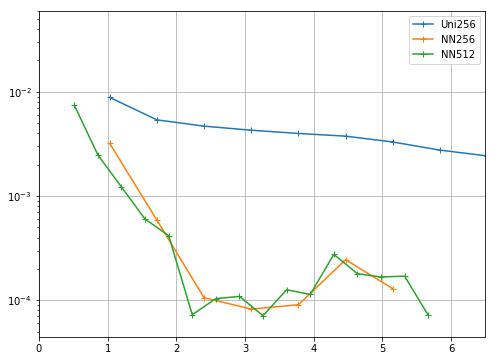

In [28]:
plt.figure(figsize=(8, 6))
#
kw = {'marker':'+'}
plt.plot(pc_uni[0], pc_uni[1][0]/pc_uni[1][1], label='Uni256', **kw)
plt.plot(pc_nn[0], pc_nn[1][0]/pc_nn[1][1], label='NN256', **kw)
plt.plot(pc_nn512[0], pc_nn512[1][0]/pc_nn512[1][1], label='NN512', **kw)
plt.legend()
plt.grid()
plt.yscale('log')
# plt.xticks([0.1+0.5*i for i in range(13)])
plt.axis([0., 6.5, -0.01, 0.06])
# plt.xscale('log')

In [31]:
ls /global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/

ELG.v5_10_7.latest.fits            hp-ran256.fits
ELG.v5_10_7.latest.rands.fits      hp-ran512.fits
data4fold/                         ngal-feat-256-wo-ndet.fits
eBOSS_ELG_full_ALL_vtest.dat.fits  ngal-feat-256-wofrac-wondet.fits
eBOSS_ELG_full_ALL_vtest.ran.fits  ngal-feat-256.fits
hp-deltaNN512.fits                 xi-256nn.npy
hp-elg256.fits                     xi-256uni.npy
hp-elg512.fits                     xi-512nn.npy
hp-nn256.fits


In [36]:
np.average(deltaNN512[mask], weights=ranhp[mask]/np.max(ranhp))

-2.6436370016422222e-05

In [37]:
RANDOM = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.ran.fits', 
               lower=True, columns=['ra', 'dec', 'probanymask', 'chunk'])

In [39]:
from syslss import hpixsum

In [44]:
nnhp_512  = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-nn512.fits')

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [45]:
# read elg hp map
elghp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg512.fits')
ranhp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran512.fits')

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [40]:
maskname = ['1', '2', '3', '5']
ranmasks = []
for i in ['1', '2', '3', '5']:
    mask2i = RANDOM['chunk'] == b'eboss2'+bytes(i, 'utf8')
    ranmasks.append(hpixsum(512, RANDOM['ra'][mask2i], 
                       RANDOM['dec'][mask2i], 
                       value=1-RANDOM['probanymask'][mask2i]).astype(np.bool))

In [46]:
pc_nn512_i = []
for mask_i in ranmasks:
    mask_i &= nnhp_512!=0.0
    ranNN512 = ranhp *  nnhp_512
    deltaNN512 = np.zeros(12*512**2)
    deltaNN512[mask_i] = elghp[mask_i] / ranNN512[mask_i] * (ranNN512[mask_i].sum()/elghp[mask_i].sum()) - 1.
    pc_nn512_i.append(get_xi_pc(deltaNN512, ranhp/np.max(ranhp), res=512, maxang=6, mask=mask_i))

In [47]:
np.save('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/xi-512nn-chunks', pc_nn512_i)

In [3]:
import numpy as np

In [12]:
pc_nn512 = np.load('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/xi-512nn.npy')

In [16]:
pc_nn512_i = np.load('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/xi-512nn-chunks.npy')

[0.0, 6.5, -0.01, 0.06]

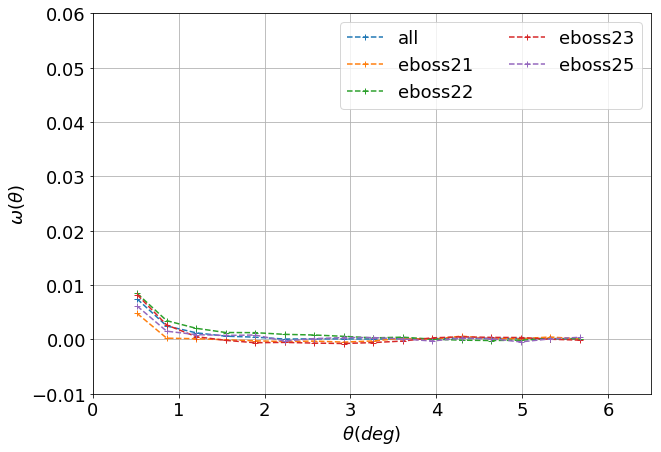

In [18]:
plt.figure(figsize=(10, 7))
plt.rc('font',size=18)
maskname = ['1', '2', '3', '5']
kw = {'marker':'+', 'alpha':1.0, 'ls':'--'}
#plt.plot(pc_uni[0], pc_uni[1][0]/pc_uni[1][1], label='Uni256', **kw)
#plt.plot(pc_nn[0], pc_nn[1][0]/pc_nn[1][1], label='NN256', **kw)
plt.plot(pc_nn512[0], pc_nn512[1][0]/pc_nn512[1][1], label='all', **kw)
for l in range(len(pc_nn512_i)):
    pc_chunki = pc_nn512_i[l]
    plt.plot(pc_chunki[0], pc_chunki[1][0]/pc_chunki[1][1], **kw,
            label='eboss2'+maskname[l])
    
plt.legend(ncol=2)
plt.grid()
plt.ylabel(r'$\omega(\theta)$')
plt.xlabel(r'$\theta(deg)$')
# plt.yscale('log')
# plt.xticks([0.1+0.5*i for i in range(13)])
plt.axis([0., 6.5, -0.01, 0.06])

# plt.xscale('log')

<img src="eboss21-anand.png" width="850">
<img src="eboss22-anand.png" width="850">

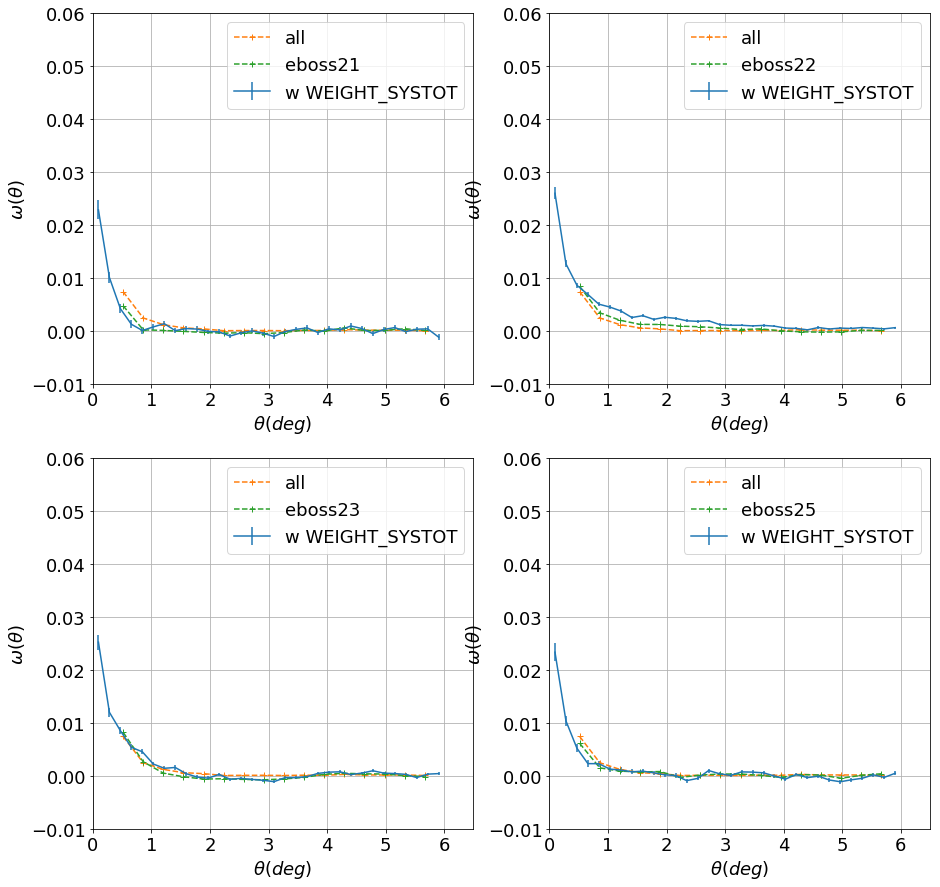

In [29]:
f, a = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
plt.rc('font',size=18)
a = a.flatten()
maskname = ['1', '2', '3', '5']
kw = {'marker':'+', 'alpha':1.0, 'ls':'--'}

for l in range(len(pc_nn512_i)):
    d = np.loadtxt('./eboss2'+maskname[l]+'.allphot.lin.Dsyst_angular', usecols=(0,1,2))
    a[l].errorbar(d[:,0], d[:,1], d[:,2], linestyle='-', label='w WEIGHT_SYSTOT')
    a[l].plot(pc_nn512[0], pc_nn512[1][0]/pc_nn512[1][1], label='all', **kw)
    pc_chunki = pc_nn512_i[l]
    a[l].plot(pc_chunki[0], pc_chunki[1][0]/pc_chunki[1][1], **kw,
            label='eboss2'+maskname[l])    
    a[l].legend(ncol=1)
    a[l].grid()
    a[l].set_ylabel(r'$\omega(\theta)$')
    a[l].set_xlabel(r'$\theta(deg)$')
    a[l].axis([0., 6.5, -0.01, 0.06])

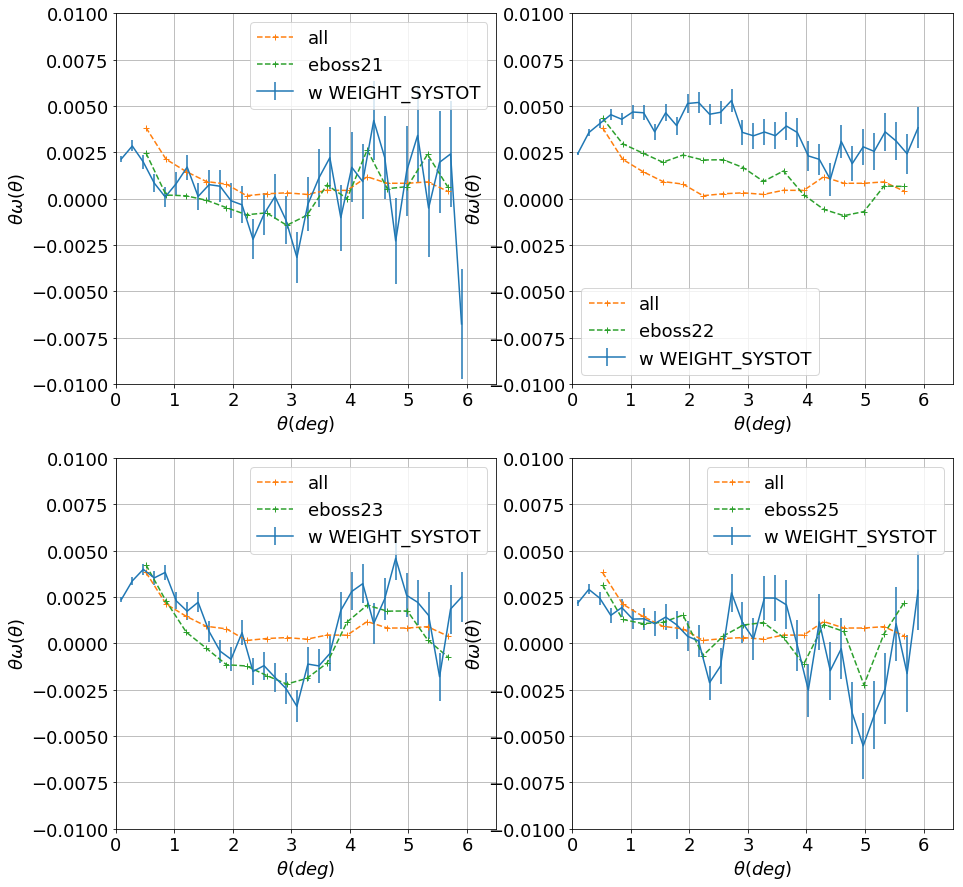

In [31]:
f, a = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
plt.rc('font',size=18)
a = a.flatten()
maskname = ['1', '2', '3', '5']
kw = {'marker':'+', 'alpha':1.0, 'ls':'--'}

for l in range(len(pc_nn512_i)):
    d = np.loadtxt('./eboss2'+maskname[l]+'.allphot.lin.Dsyst_angular', usecols=(0,1,2))
    a[l].errorbar(d[:,0], d[:,0]*d[:,1], d[:,0]*d[:,2], linestyle='-', label='w WEIGHT_SYSTOT')
    a[l].plot(pc_nn512[0], pc_nn512[0]*pc_nn512[1][0]/pc_nn512[1][1], label='all', **kw)
    pc_chunki = pc_nn512_i[l]
    a[l].plot(pc_chunki[0], pc_chunki[0]*pc_chunki[1][0]/pc_chunki[1][1], **kw,
            label='eboss2'+maskname[l])    
    a[l].legend(ncol=1)
    a[l].grid()
    a[l].set_ylabel(r'$\theta\omega(\theta)$')
    a[l].set_xlabel(r'$\theta(deg)$')
    a[l].axis([0., 6.5, -0.01, 0.01])